# Perform an analytical calculation of the Coding Power comparing a "_perfect_" image with one blurred by spatial resolution

In [1]:
%matplotlib ipympl
import numpy as np
import sys

# setting path for mask_utils package
sys.path.append('F:/CodedMasks/')

from mask_utils.imaging_utils import snr_vs_off_axis, solid_angle, decode
from mask_utils.fits_utils import read_mask_bulk
from scipy.ndimage  import gaussian_filter
import matplotlib.pyplot as plt
from matplotlib import cm

## Loading mask, rmatrix and bulk arrays

In [2]:
mask_file = "F:/CodedMasks/mask_050_1040x17/mask_050_1040x17_20250710.fits"
mask, hdmask = read_mask_bulk(mask_file, 'MASK', header_out=True, verbose=False)
rmatrix = read_mask_bulk(mask_file, 'RMATRIX', header_out=False, verbose=False)
bulk = read_mask_bulk(mask_file, 'SENS', header_out=False, verbose=False)

## Getting mask info

In [3]:
ELXDIM = hdmask['ELXDIM']
ELYDIM = hdmask['ELYDIM']

## Generating a dummy detector image and a blurred version
For the gaussian blur, we consider a resolution (1$\sigma$) of 80 $\mu$m in X direction and 2.5 mm in Y direction

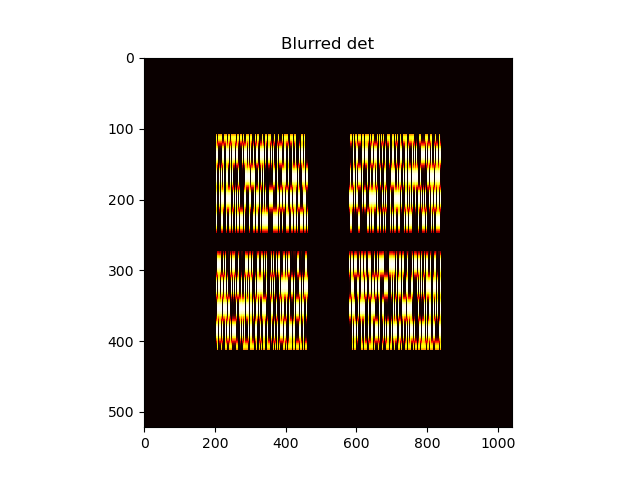

In [4]:
det = bulk*mask

(sigma_x, sigma_y) = (0.080/ELXDIM, 2.5/ELYDIM)
blurred_det = gaussian_filter(det, (sigma_x, sigma_y), axes=(0,1), order=0, mode='constant', cval=0, truncate=6) * bulk

plt.figure()
plt.title('Blurred det')
plt.imshow(blurred_det.T, cmap=cm.hot,  interpolation='nearest', aspect=ELYDIM/ELXDIM)
plt.show()

## Performing deconvolution  f the two detector images (ideal and blurred)

In [5]:
ideal_cc = decode(det, rmatrix, bulk)
peak_ideal = np.max(ideal_cc)
peak_p = np.unravel_index(np.argmax(ideal_cc), ideal_cc.shape)


blurred_cc = decode(blurred_det, rmatrix, bulk)
peak_blurred = np.max(blurred_cc)

## Printing results

In [6]:
print("Coding power ideal:  ", peak_ideal/np.sum(det))
print("Coding power blurred:", peak_blurred/np.sum(det))

Coding power ideal:   1.0140158057837478
Coding power blurred: 0.8295728091636473


## Plotting results

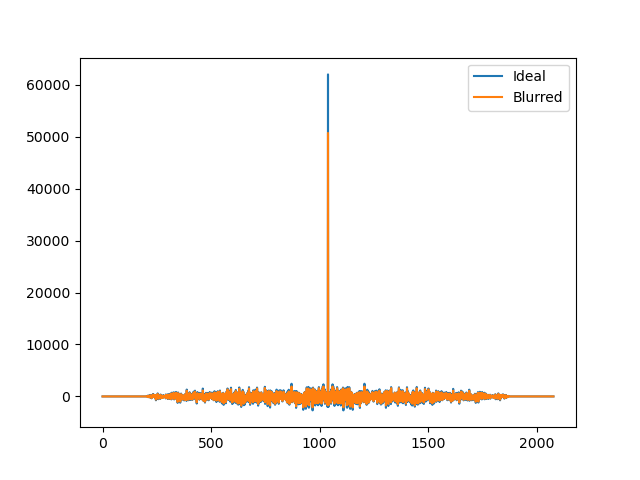

In [7]:
plt.figure()
plt.title("")
plt.plot( ideal_cc[:, peak_p[1]], label="Ideal")
plt.plot( blurred_cc[:, peak_p[1]], label="Blurred")
plt.legend()
plt.show()